# Práctica: Segmentación de Mercado

**El objetivo de esta práctica es el de segmentar un conjunto de clientes de una institución bancaria a partir de diferentes atributos**

In [1]:
#Importamos las librerías
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Leemos los datos del data frame
data = pd.read_csv("../files/CreditCardCustomerData.csv")
data.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


Aplicamos un Describe a los datos para observar la cantidad de registros (660) y los diferentes valores para las diferentes variables:

In [3]:
data.describe()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,330.500000,55141.443939,34574.242424,4.706061,2.403030,2.606061,3.583333
std,190.669872,25627.772200,37625.487804,2.167835,1.631813,2.935724,2.865317
min,1.000000,11265.000000,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,165.750000,33825.250000,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,330.500000,53874.500000,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,495.250000,77202.500000,48000.000000,6.000000,4.000000,4.000000,5.000000
max,660.000000,99843.000000,200000.000000,10.000000,5.000000,15.000000,10.000000


Se eliminan las columnas: Sl_No y Customer Key:

In [4]:
data1= data.drop("Sl_No",axis=1)

In [5]:
data1= data1.drop("Customer Key",axis=1)
data1.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


Observamos los datos sin estandarizar en un box plot:


<AxesSubplot: >

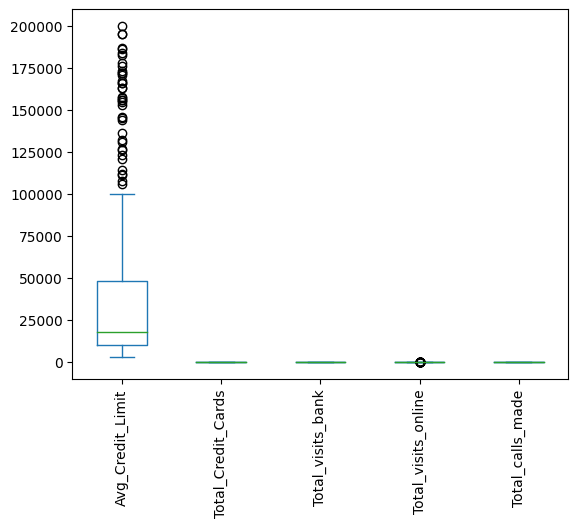

In [6]:
data1.plot.box(rot=90)

**Estandarizamos:**

<AxesSubplot: >

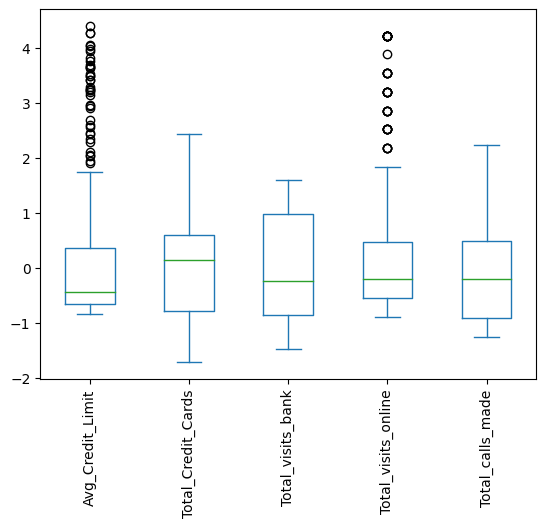

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_st = scaler.fit_transform(data1)
data_st = pd.DataFrame(data_st, columns=["Avg_Credit_Limit","Total_Credit_Cards","Total_visits_bank","Total_visits_online","Total_calls_made"])
data_st.plot.box(rot=90)

Aplicamos la correlación:

In [8]:
data_st.corr()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Avg_Credit_Limit,1.000000,0.608860,-0.100312,0.551385,-0.414352
Total_Credit_Cards,0.608860,1.000000,0.315796,0.167758,-0.651251
Total_visits_bank,-0.100312,0.315796,1.000000,-0.551861,-0.506016
Total_visits_online,0.551385,0.167758,-0.551861,1.000000,0.127299
Total_calls_made,-0.414352,-0.651251,-0.506016,0.127299,1.000000


Para este ejercicio no observé correlaciones altas entre las variables, por lo tanto decidí no hacer la reducción de dimensionalidad. Así que trabajaré con las 5 variables.

**Segmentación:**

C:\Users\Marco\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Marco\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Marco\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\U

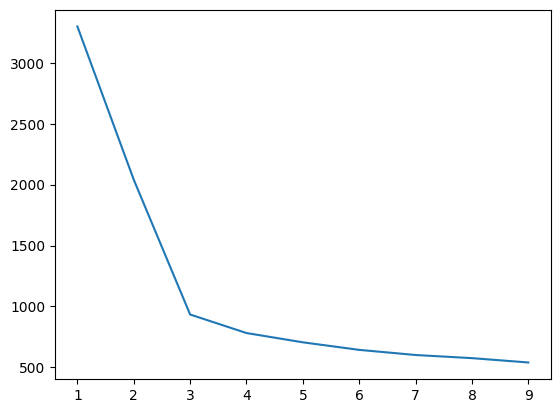

In [9]:
from sklearn.cluster import KMeans

within_var = []
k_vals = range(1,10)

for k in k_vals:
  km = KMeans(n_clusters=k, random_state=1)
  km.fit_transform(data_st)
  within_var.append(km.inertia_)

plt.plot(np.array(k_vals), np.array(within_var))
plt.show()

Se aplicó la clusterización con el algoritmo K-medias, de acuerdo al resultado, observamos que el codo se encuentra en el valor 3, por lo tanto se crearán 3 grupos.

In [10]:
km = KMeans(n_clusters=3, random_state=1)
km_rfm = km.fit_predict(data_st)
km.labels_

C:\Users\Marco\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 0, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

Agregamos la columna de grupo, para observar que ya asignó un grupo a cada registro. Los valores de los grupos son: 0, 1 y 2.

In [11]:
data_st["gpo"] = km.labels_
data_st.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,gpo
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537,1
1,0.410293,-0.787585,-1.473731,2.520519,1.891859,0
2,0.410293,1.058973,-0.860451,0.134290,0.145528,1
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528,1
4,1.740187,0.597334,-1.473731,3.202298,-0.203739,2


Ahora agrupamos el total de clientes que hay por grupos y obervamos los parámetros que comparten:

In [12]:
seg = data_st.groupby("gpo").mean()
seg["tot_clientes"] = data_st.groupby("gpo").size() 
seg

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,tot_clientes
gpo,,,,,,
0,-0.595796,-1.059623,-0.901518,0.322997,1.148109,224
1,-0.021062,0.373690,0.666395,-0.553672,-0.553005,386
2,2.831764,1.862226,-1.105763,2.827319,-0.874330,50


**Resultados:**

Perfilando los grupos puedo deducir lo siguiente:


*   **Grupo 0 :** Clientes con bajo poder crediticio, que prefieren comunicarse por medios digitales al banco.
*   **Grupo 1 :** Clientes con un poder crediticio promedio, que acuden a las sucursales del banco regularmente.
*   **Grupo 2 :** Clientes con alto poder crediticio que prefieren una atención directamente en las sucursales del banco.







In [13]:
# Ajuste del modelo K-Means con 2 clusters
km_2 = KMeans(n_clusters=2, random_state=1)
km_rfm_2 = km_2.fit_predict(data_st.drop('gpo', axis=1))

# Asignamos los nuevos grupos
data_st["gpo_2"] = km_rfm_2

# Agrupamos para ver las características promedio de cada grupo y su tamaño
seg_2 = data_st.groupby("gpo_2").mean()
seg_2["tot_clientes"] = data_st.groupby("gpo_2").size()

seg_2

C:\Users\Marco\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,gpo,tot_clientes
gpo_2,,,,,,,
0,0.306097,0.544393,0.463165,-0.165943,-0.589854,1.114679,436
1,-0.595796,-1.059623,-0.901518,0.322997,1.148109,0.000000,224


Al compararlo con el modelo de 3 grupos podemos decir que:

Grupo 0: 436 clientes

• Moderadamente alto en límite de crédito promedio

• Número superior al promedio de tarjetas de crédito

• Visitas al banco y llamadas realizadas ligeramente por encima del promedio

• Visitas en línea ligeramente por debajo del promedio

Grupo 1: 224 clientes

• Bajo en límite de crédito promedio

• Menor número de tarjetas de crédito

• Menos visitas al banco

• Más visitas en línea y llamadas realizadas

1. Hay cambios en los perfiles de los grupos: Los perfiles de los grupos de clientes cabian  significativamente. En el grupo con 2 clusters se combinan características que estaban separadas en los grupos de 3 clusters.

2. Distribución de clientes en los grupos: La cantidad de clientes en cada grupo varia, podria deberse a la combinacion de los grupos.

3. Estrategias de negocio: Con solo 2 grupos, las estrategias son más generalizadas y menos específicas, lo que podría afectar la efectividad de las acciones de marketing.

Concluciones

En base a estas diferencias y observaciones, podemos concluir sobre cuál es el número óptimo de segmentos para este conjunto de datos y cómo cada enfoque afecta nuestra comprensión de las necesidades y comportamientos de los clientes.